# Build the sentence embedding pipeline using 🤗 Transformers Library

### 👽 Import Libraries

In [5]:
#! pip install sentence-transformers

In [1]:
#ignore warning

from transformers.utils import logging
logging.set_verbosity_error()

🤖 Transformers library simplifies natural language processing tasks with its pipeline function, enabling easy implementation of state-of-the-art models in just a few lines of code.

### 👲 Define Model for Sentence Transformation

**Pretrained Model: 👇**

- 👉 model-3(all-MiniLM-L6-v2): https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/tree/main

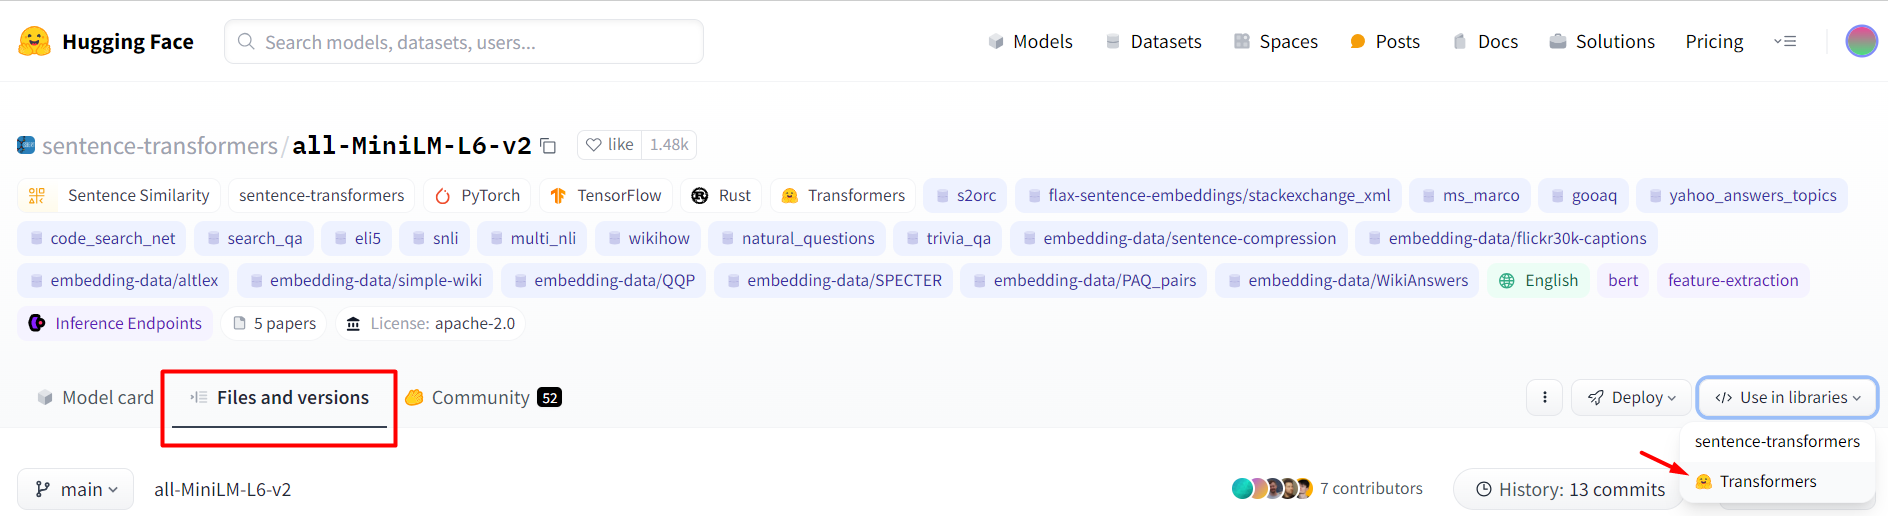

In [2]:
#to call sentence embedding models
from sentence_transformers import SentenceTransformer

💬 SentenceTransformer: A library allowing easy access to pre-trained sentence embedding models for various NLP tasks.

In [4]:
model = SentenceTransformer("all-MiniLM-L6-v2")
print(f"model details: {model}")

model details: SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
)


In [35]:
#sentences1

sentences1 = ['Pandas eat bamboo leaves primarily.',
              'Pandas have distinctive black patches.',
              'Pandas are animals.',
              'Conservationists work to save pandas.'
             ]

print(f"About Pandas - sentences1:\n {sentences1}\n")

#sentences2

sentences2 = ['Tigers are large, carnivorous felines.',
              'Stripes adorn a tiger fur coat.',
              'Tigers are wild animals.',
              'Tigers habitats include dense forests.'
             ]

print(f"About Tiger - sentences2:\n {sentences2}")



About Pandas - sentences1:
 ['Pandas eat bamboo leaves primarily.', 'Pandas have distinctive black patches.', 'Pandas are animals.', 'Conservationists work to save pandas.']

About Tiger - sentences2:
 ['Tigers are large, carnivorous felines.', 'Stripes adorn a tiger fur coat.', 'Tigers are wild animals.', 'Tigers habitats include dense forests.']


### 🔍 Sentence Embedding Overview:
Sentence embedding represents a sentence as a dense vector in a high-dimensional space, capturing its semantic meaning.

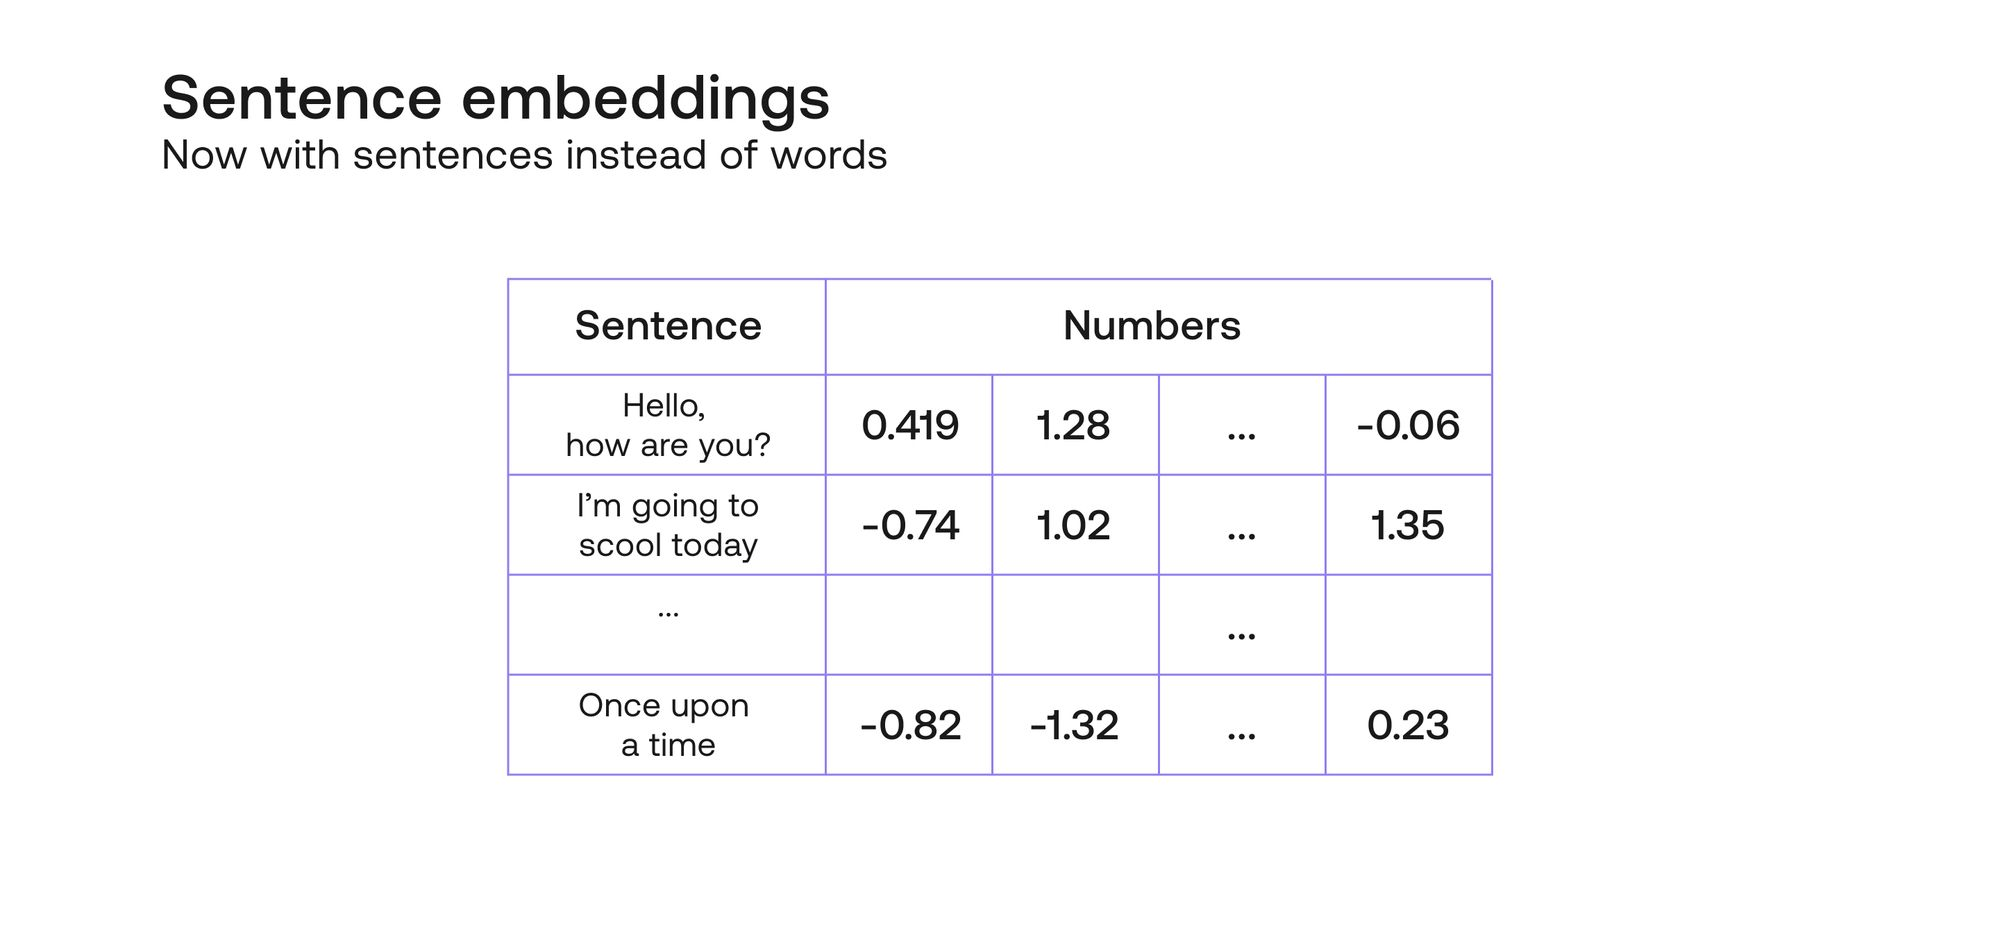

### 🔧 Encoder Function:
During embedding, the encoder transforms the sentence into a fixed-length numerical representation by encoding its semantic information into a vector format.

In [36]:
embedding1 = model.encode(sentences1, convert_to_tensor=True)
print(f'embedding1(numerical vector representation for Panda-sentences-1): \n\n {embedding1}')


embedding1(numerical vector representation for Panda-sentences-1): 

 tensor([[-0.0185, -0.0165,  0.0007,  ...,  0.0530,  0.0574,  0.0581],
        [-0.0318, -0.0361, -0.0344,  ..., -0.0337,  0.0014,  0.0583],
        [ 0.0192, -0.0501,  0.0255,  ...,  0.0416,  0.0592,  0.0581],
        [-0.0111,  0.0247,  0.0235,  ...,  0.0043,  0.0382,  0.0663]])


In [37]:
embedding2 = model.encode(sentences2, convert_to_tensor=True)
print(f'embedding2(numerical vector representation for Tiger-sentences-2): \n\n {embedding2}')


embedding2(numerical vector representation for Tiger-sentences-2): 

 tensor([[ 0.0469,  0.0401,  0.0081,  ...,  0.0357,  0.0699, -0.0049],
        [-0.0716,  0.1098,  0.0255,  ..., -0.0390, -0.0034,  0.0097],
        [-0.0081,  0.0301,  0.0071,  ...,  0.0161,  0.0291,  0.0124],
        [ 0.0244, -0.0355,  0.0148,  ..., -0.0030,  0.0358,  0.0230]])


### 📏 Cosine Similarities/Distances between two sentences:

Cosine similarity measures the cosine of the angle between two vectors, indicating their similarity in orientation. It's vital for comparing the semantic similarity between sentences, irrespective of their magnitude.

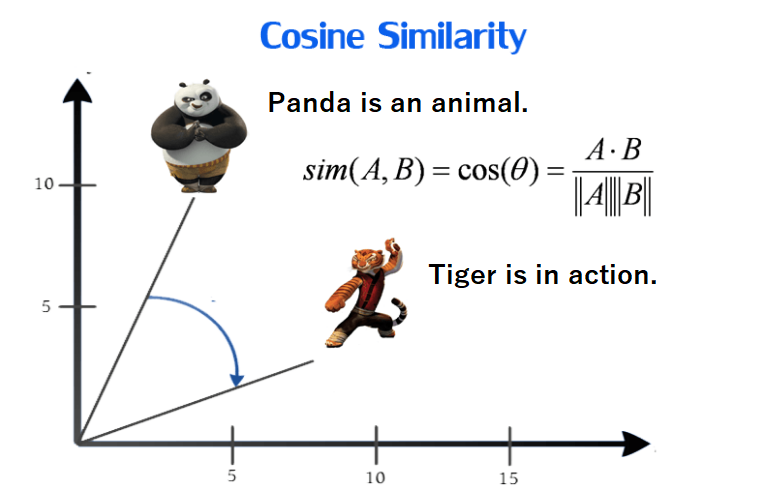

In [38]:
#to import cosine similarities

from sentence_transformers import util

In [39]:
cosine_scores = util.cos_sim(embedding1, embedding2)

In [40]:
print(f"cosine scores between sentences1 and sentences2 after embedding:\n\n {cosine_scores}")

cosine scores between sentences1 and sentences2 after embedding:

 tensor([[0.2794, 0.1563, 0.2581, 0.2416],
        [0.1538, 0.3154, 0.2210, 0.1686],
        [0.3221, 0.3046, 0.3704, 0.2447],
        [0.2362, 0.1985, 0.2834, 0.2471]])


In [34]:
for i in range(len(sentences1)):
    print("{} \t {} \t\t\t Score: {:.4f}".format(sentences1[i],
                                                 sentences2[i],
                                                 cosine_scores[i][i]))

Pandas eat bamboo leaves primarily. 	 Tigers are large, carnivorous felines. 			 Score: 0.2794
Pandas are animals. 	 Stripes adorn a tiger fur coat. 			 Score: 0.3046
Pandas have distinctive black patches. 	 Tigers are wild animals and love hunting. 			 Score: 0.1827
Conservationists work to save pandas. 	 Tigers habitats include dense forests. 			 Score: 0.2471
